### Important packages

In [311]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
pd.set_option('display.max_columns', 200)

### Get Data

In [312]:
airline = pd.read_csv('Airline.csv')

### Exploratory Data Analysis

In [313]:
airline

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,satisfied,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,3,2,5,2,2,3,3,4,4,4,2,0,0.0
129876,dissatisfied,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,4,2,1,1,3,2,3,3,1,2,1,174,172.0
129877,dissatisfied,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,3,3,2,2,4,4,3,4,2,3,2,155,163.0
129878,dissatisfied,Male,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,2,3,2,2,3,3,2,3,2,1,2,193,205.0


In [314]:
airline.shape

(129880, 23)

In [315]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [7]:
airline.head(10)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,Male,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,3,2,0,2,2,5,4,5,5,4,2,0,0.0
6,satisfied,Female,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,3,2,5,5,5,5,0,5,5,5,3,17,15.0
7,satisfied,Male,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,3,2,0,2,2,3,3,4,5,4,2,0,0.0
8,satisfied,Female,Loyal Customer,56,Personal Travel,Business,73,0,0,0,3,5,3,5,4,4,0,1,5,4,4,0,0.0
9,satisfied,Male,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,3,2,0,2,2,2,4,5,3,4,2,30,26.0


In [316]:
airline.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [317]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

#### Renaming columns and exploring data

In [318]:
airline.columns

Index(['satisfaction', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

In [319]:
##renaming
airline.rename(columns=lambda x: x.replace(' ', '_'), inplace=True)

In [320]:
airline

,satisfaction,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Seat_comfort,Departure/Arrival_time_convenient,Food_and_drink,Gate_location,Inflight_wifi_service,Inflight_entertainment,Online_support,Ease_of_Online_booking,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,satisfied,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,3,2,5,2,2,3,3,4,4,4,2,0,0.0
129876,dissatisfied,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,4,2,1,1,3,2,3,3,1,2,1,174,172.0
129877,dissatisfied,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,3,3,2,2,4,4,3,4,2,3,2,155,163.0
129878,dissatisfied,Male,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,2,3,2,2,3,3,2,3,2,1,2,193,205.0


In [322]:
airline.isna().sum()

satisfaction                           0
Gender                                 0
Customer_Type                          0
Age                                    0
Type_of_Travel                         0
Class                                  0
Flight_Distance                        0
Seat_comfort                           0
Departure/Arrival_time_convenient      0
Food_and_drink                         0
Gate_location                          0
Inflight_wifi_service                  0
Inflight_entertainment                 0
Online_support                         0
Ease_of_Online_booking                 0
On-board_service                       0
Leg_room_service                       0
Baggage_handling                       0
Checkin_service                        0
Cleanliness                            0
Online_boarding                        0
Departure_Delay_in_Minutes             0
Arrival_Delay_in_Minutes             393
dtype: int64

In [323]:
airline[["Departure_Delay_in_Minutes","Arrival_Delay_in_Minutes",]]

,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
0,0,0.0
1,310,305.0
2,0,0.0
3,0,0.0
4,0,0.0
...,...,...
129875,0,0.0
129876,174,172.0
129877,155,163.0
129878,193,205.0


In [324]:
airline.loc[airline.duplicated()]

,satisfaction,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Seat_comfort,Departure/Arrival_time_convenient,Food_and_drink,Gate_location,Inflight_wifi_service,Inflight_entertainment,Online_support,Ease_of_Online_booking,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes


In [325]:
airline['Arrival_Delay_in_Minutes']

0           0.0
1         305.0
2           0.0
3           0.0
4           0.0
          ...  
129875      0.0
129876    172.0
129877    163.0
129878    205.0
129879    186.0
Name: Arrival_Delay_in_Minutes, Length: 129880, dtype: float64

In [326]:
airline.loc[airline['Arrival_Delay_in_Minutes'].isnull()]

,satisfaction,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Seat_comfort,Departure/Arrival_time_convenient,Food_and_drink,Gate_location,Inflight_wifi_service,Inflight_entertainment,Online_support,Ease_of_Online_booking,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
145,satisfied,Female,Loyal Customer,21,Personal Travel,Eco,4804,0,2,0,4,5,0,5,5,4,1,4,2,3,5,20,NaN
246,satisfied,Male,Loyal Customer,28,Personal Travel,Eco,1364,0,3,0,4,2,0,4,2,1,1,3,4,3,2,0,NaN
710,satisfied,Male,Loyal Customer,28,Personal Travel,Eco,1792,0,5,0,3,5,0,5,5,4,4,5,3,4,5,24,NaN
736,satisfied,Male,Loyal Customer,9,Personal Travel,Eco,1862,0,5,0,4,3,0,3,3,5,3,4,4,4,3,0,NaN
818,dissatisfied,Male,Loyal Customer,9,Personal Travel,Eco,1668,1,0,1,1,4,1,4,4,4,5,1,5,1,4,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127739,satisfied,Male,Loyal Customer,44,Business travel,Business,3431,2,2,3,2,2,2,4,5,5,5,5,5,5,4,70,NaN
128131,satisfied,Male,Loyal Customer,39,Business travel,Business,1595,4,4,4,4,2,4,5,5,5,5,5,3,5,5,0,NaN
128710,satisfied,Female,Loyal Customer,45,Business travel,Eco,871,5,1,1,1,5,5,2,5,5,5,5,1,5,5,100,NaN
129774,satisfied,Male,disloyal Customer,49,Personal Travel,Eco,1594,5,4,5,2,3,5,3,3,1,4,3,3,4,3,0,NaN


In [146]:
airline.columns

Index(['satisfaction', 'Gender', 'Customer_Type', 'Age', 'Type_of_Travel',
       'Class', 'Flight_Distance', 'Seat_comfort',
       'Departure/Arrival_time_convenient', 'Food_and_drink', 'Gate_location',
       'Inflight_wifi_service', 'Inflight_entertainment', 'Online_support',
       'Ease_of_Online_booking', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Cleanliness', 'Online_boarding',
       'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes'],
      dtype='object')

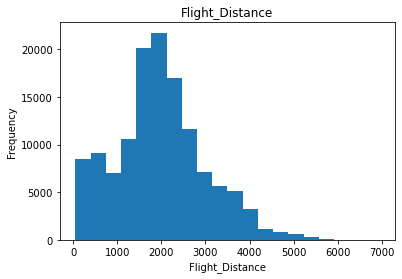

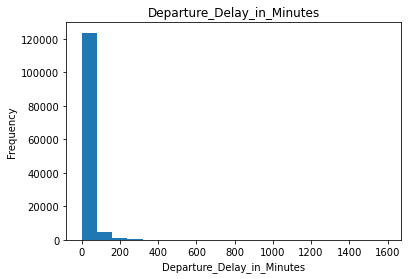

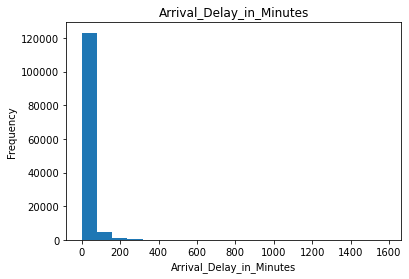

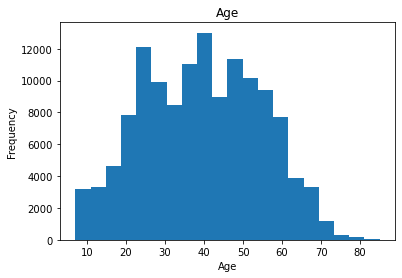

In [327]:
numerical_columns = ['Flight_Distance',
       'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes','Age']

for column in numerical_columns:
    fig, ax = plt.subplots()
    airline[column].plot(kind='hist', bins=20, title=column, ax=ax)
    ax.set_xlabel(column)
    plt.show()

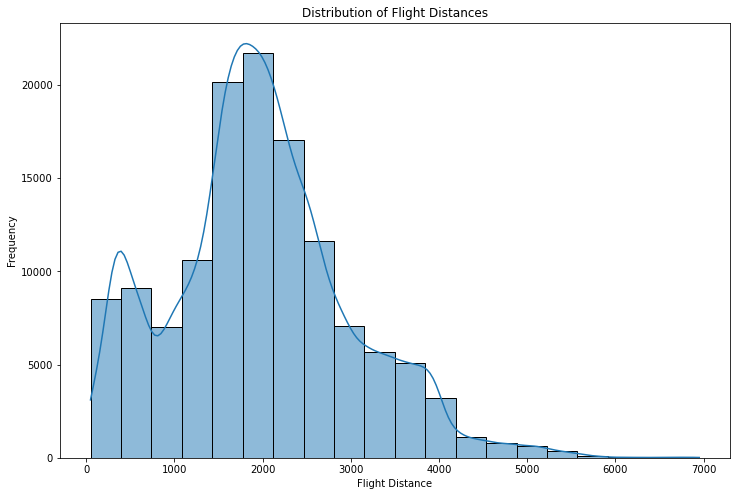

In [328]:
plt.figure(figsize=(12, 8))
sns.histplot(data=airline, x='Flight_Distance', bins=20, kde=True)
plt.title('Distribution of Flight Distances')
plt.xlabel('Flight Distance')
plt.ylabel('Frequency')
plt.show()

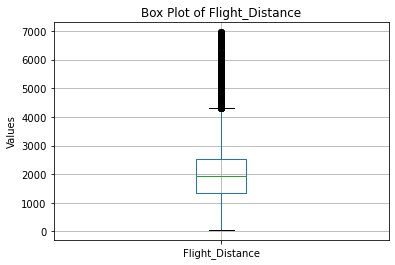

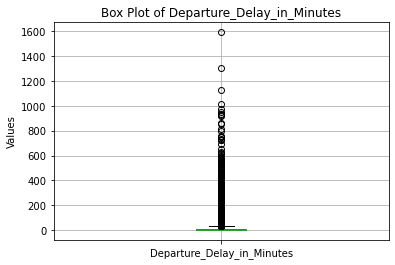

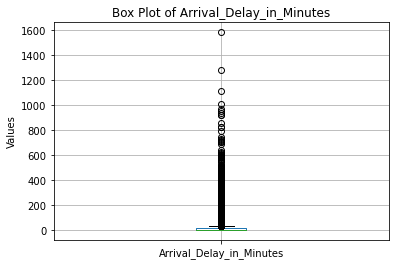

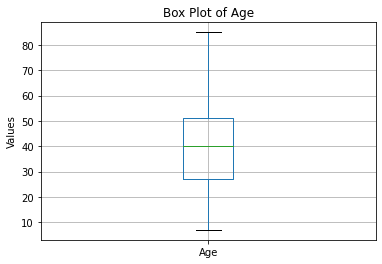

In [329]:
for column in numerical_columns:
    fig, ax = plt.subplots()
    airline.boxplot(column=column, ax=ax)
    ax.set_title(f'Box Plot of {column}')
    ax.set_ylabel('Values')
    plt.show()

outliers are present in delay columns and flight distance

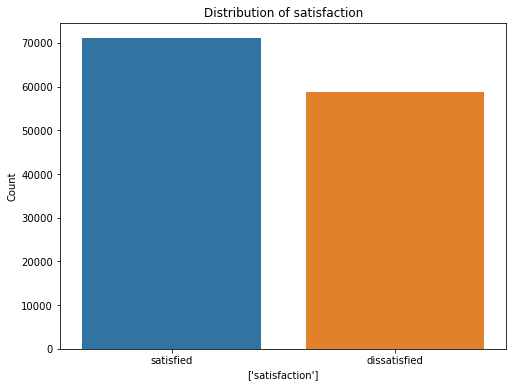

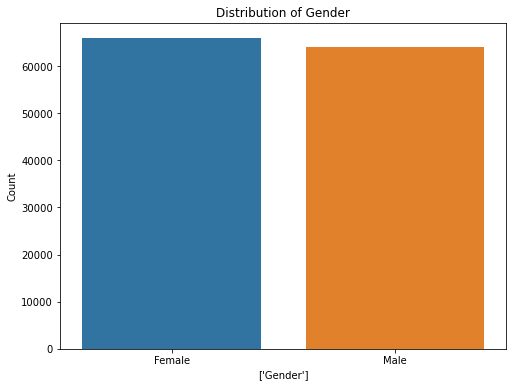

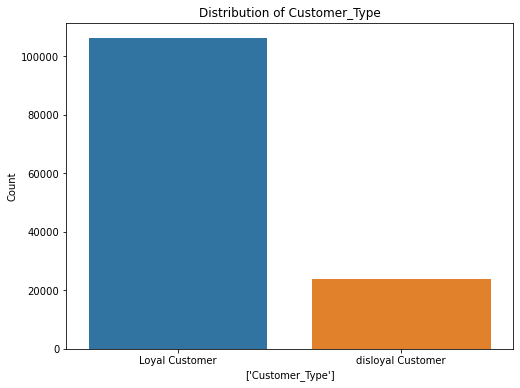

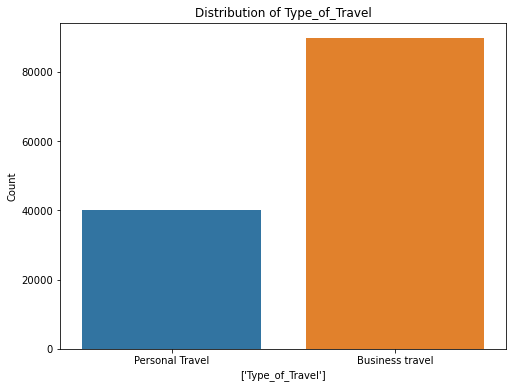

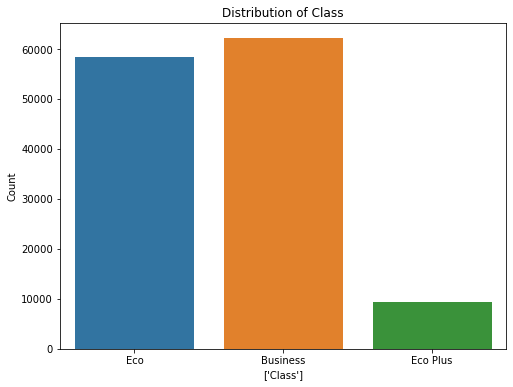

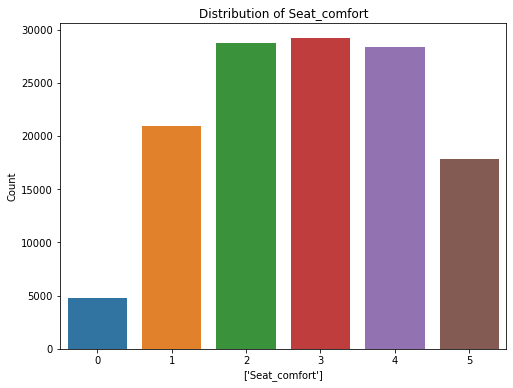

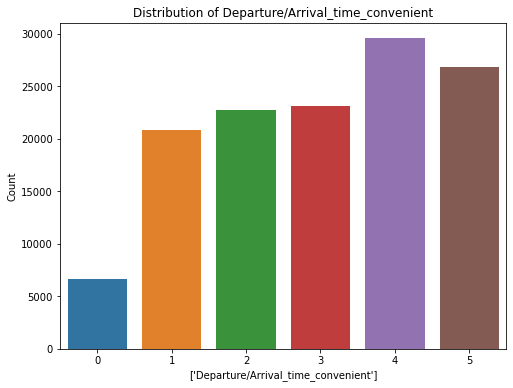

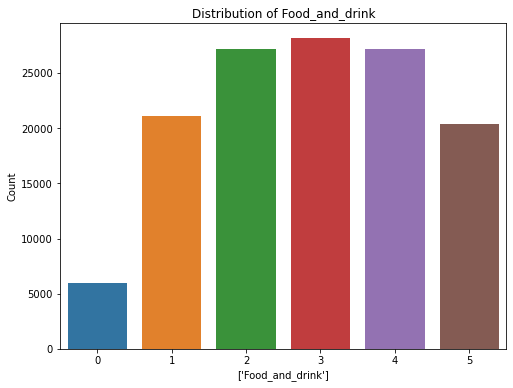

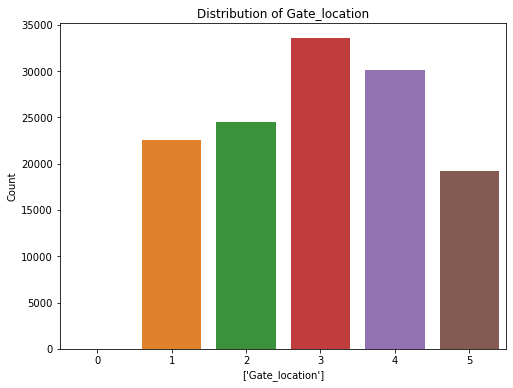

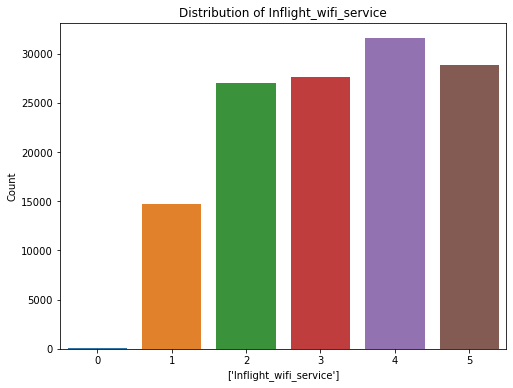

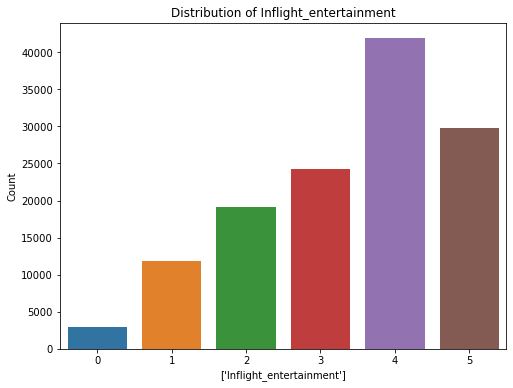

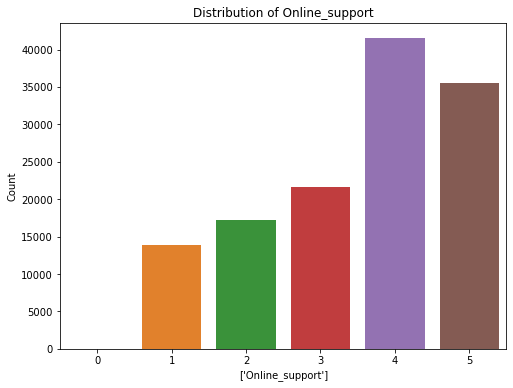

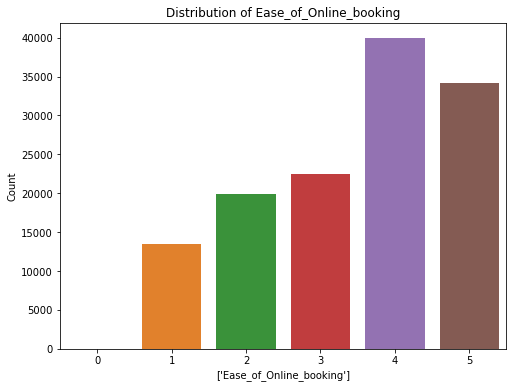

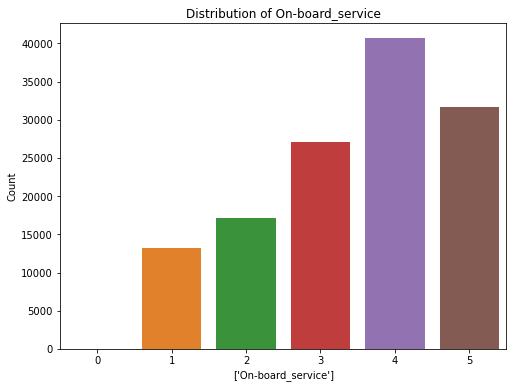

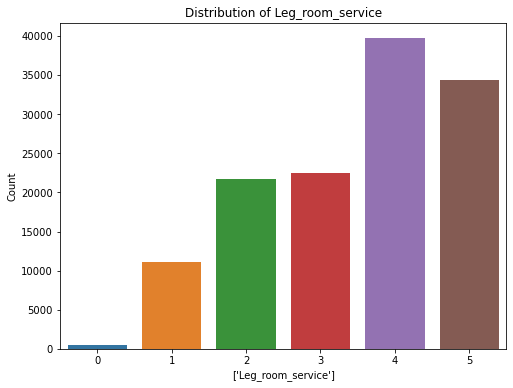

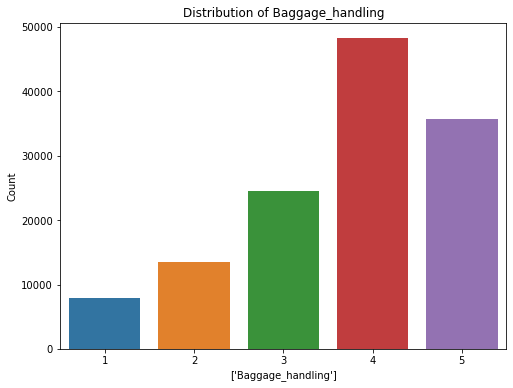

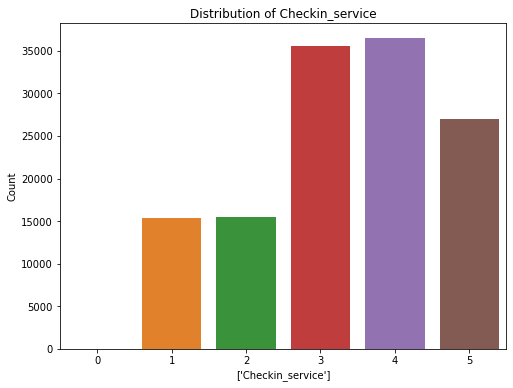

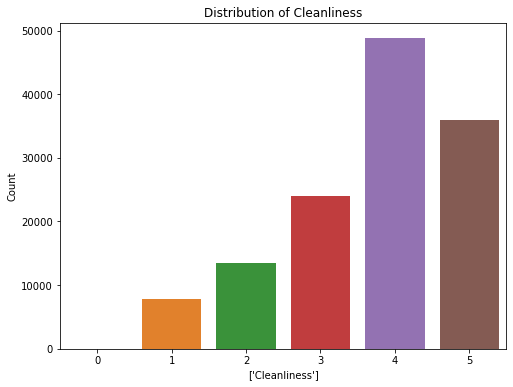

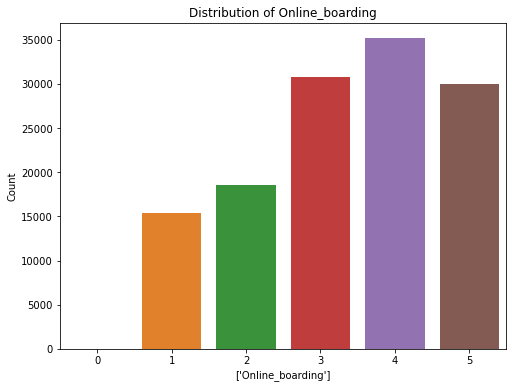

In [330]:
categorical_columns = ['satisfaction', 'Gender', 'Customer_Type',  'Type_of_Travel',
       'Class',  'Seat_comfort',
       'Departure/Arrival_time_convenient', 'Food_and_drink', 'Gate_location',
       'Inflight_wifi_service', 'Inflight_entertainment', 'Online_support',
       'Ease_of_Online_booking', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Cleanliness', 'Online_boarding']

for column in categorical_columns:
    plt.figure(figsize=(8, 6))  # Optional: Set the figure size
    sns.countplot(data=airline, x=column)
    plt.title(f'Distribution of {column}')
    plt.xlabel([column])
    plt.ylabel('Count')
    plt.show()

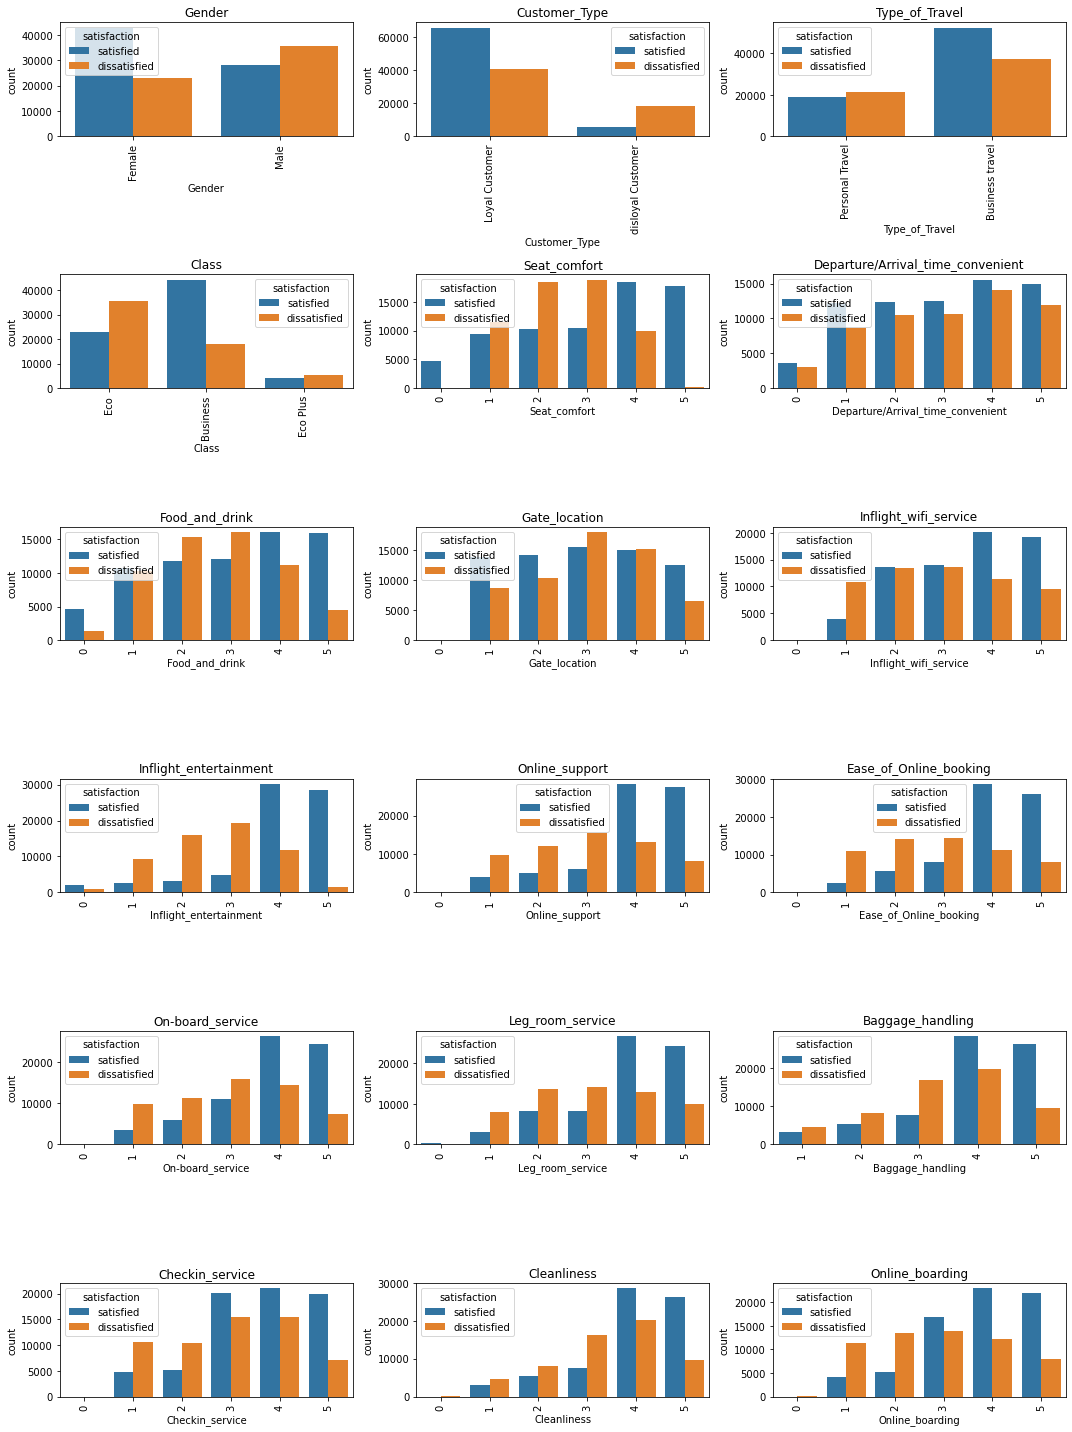

In [331]:
categorical_features_1 = ['Gender', 'Customer_Type', 'Type_of_Travel',
                          'Class', 'Seat_comfort',
                          'Departure/Arrival_time_convenient', 'Food_and_drink', 'Gate_location',
                          'Inflight_wifi_service', 'Inflight_entertainment', 'Online_support',
                          'Ease_of_Online_booking', 'On-board_service', 'Leg_room_service',
                          'Baggage_handling', 'Checkin_service', 'Cleanliness', 'Online_boarding']


fig, axs = plt.subplots(nrows=6, ncols=3, figsize=(15, 20))
axs = axs.flatten()

for i, var in enumerate(categorical_features_1):
    row = i // 3
    col = i % 3
    sns.countplot(x=var, hue='satisfaction', data=airline, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
    axs[i].set_title(var)


plt.tight_layout()

plt.show()


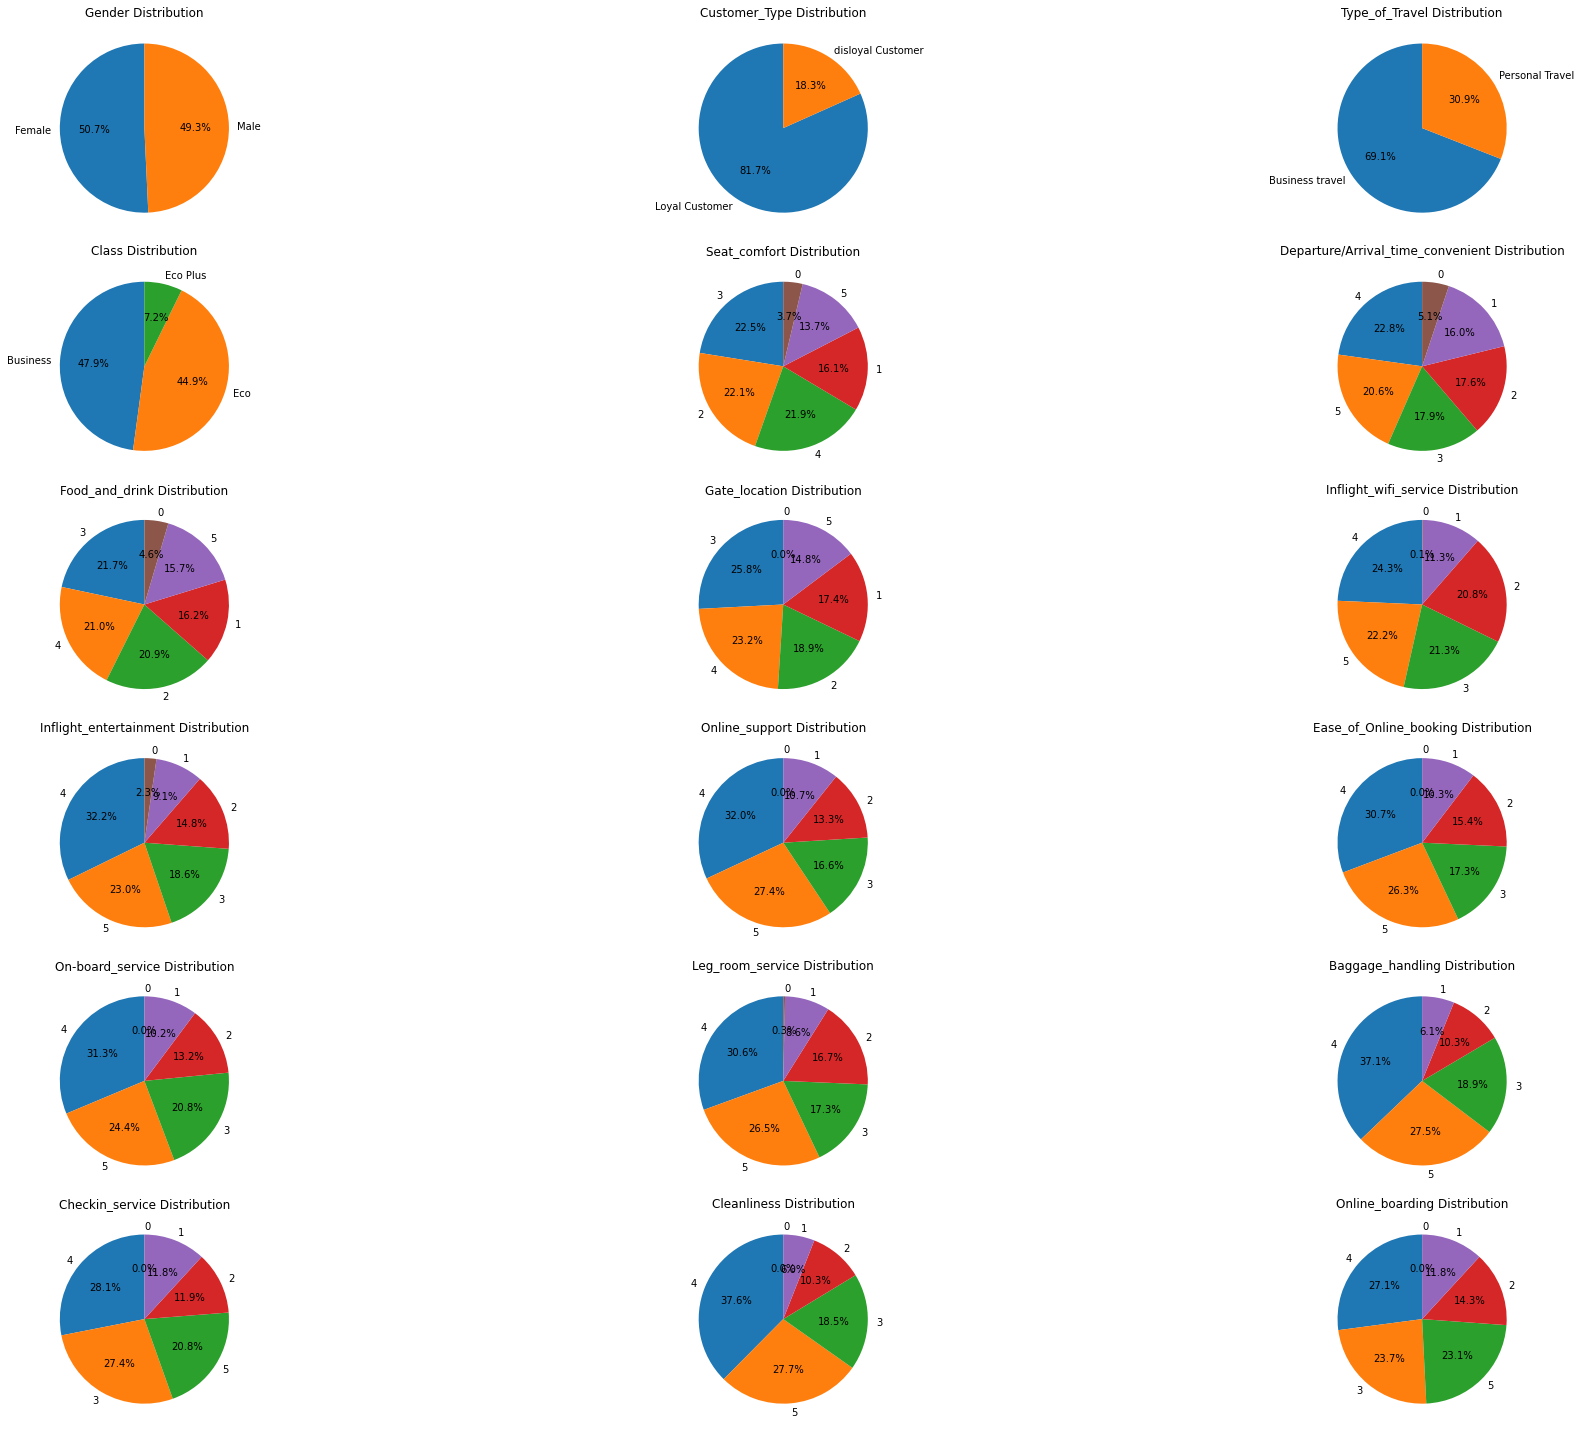

In [332]:
num_rows = 6
num_cols = 3


total_plots = num_rows * num_cols
excess_plots = len(categorical_features_1) - total_plots

fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(30, 20))

for i, var in enumerate(categorical_features_1):
    row = i // num_cols
    col = i % num_cols
    
    cat_counts = airline[var].value_counts()

    axs[row, col].pie(cat_counts, labels=cat_counts.index, autopct='%1.1f%%', startangle=90)

    # Set a title for each subplot
    axs[row, col].set_title(f'{var} Distribution')

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()


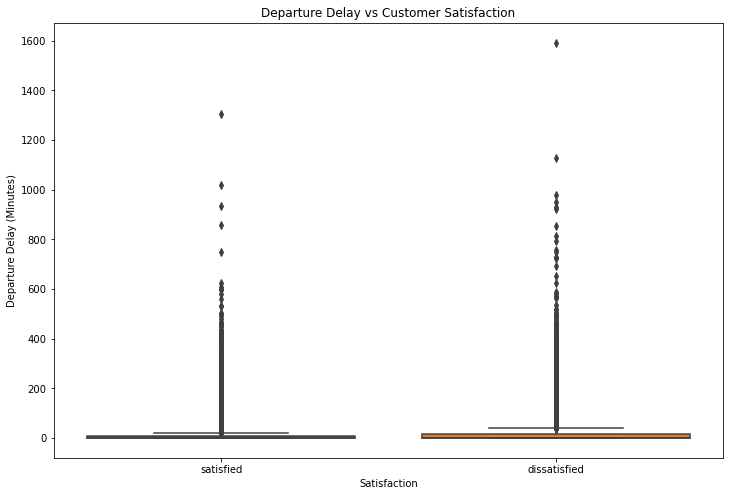

In [333]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=airline, x='satisfaction', y='Departure_Delay_in_Minutes')
plt.title('Departure Delay vs Customer Satisfaction')
plt.xlabel('Satisfaction')
plt.ylabel('Departure Delay (Minutes)')
plt.show()

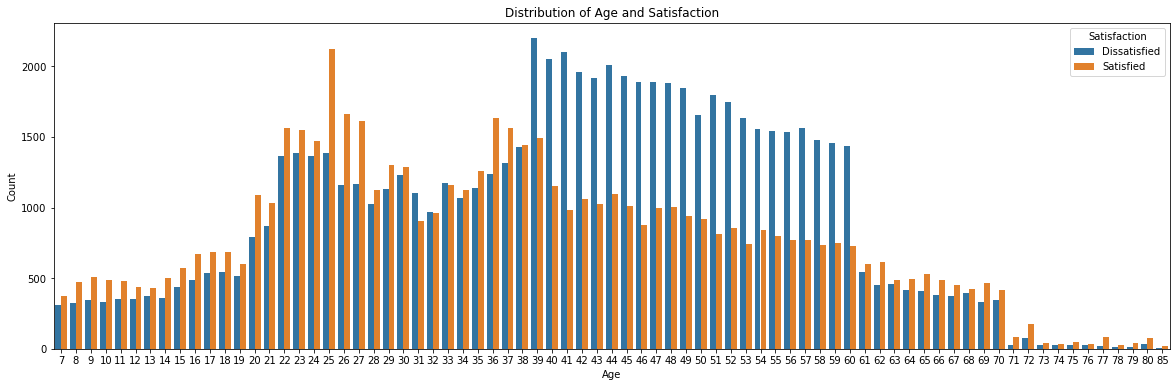

In [334]:
plt.figure(figsize=(20, 6))
sns.countplot(data=airline, x='Age', hue='satisfaction')
plt.title('Distribution of Age and Satisfaction')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Satisfaction', loc='upper right', labels=['Dissatisfied', 'Satisfied'])
plt.show()

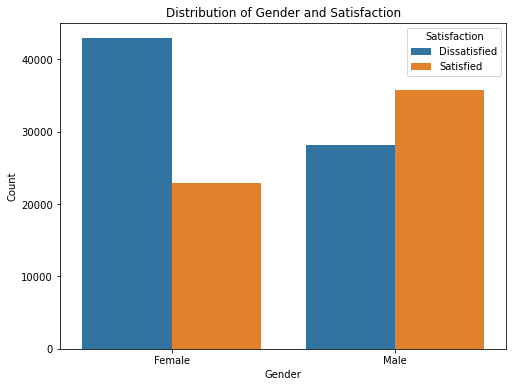

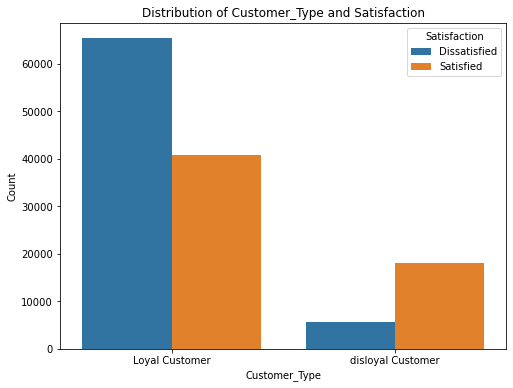

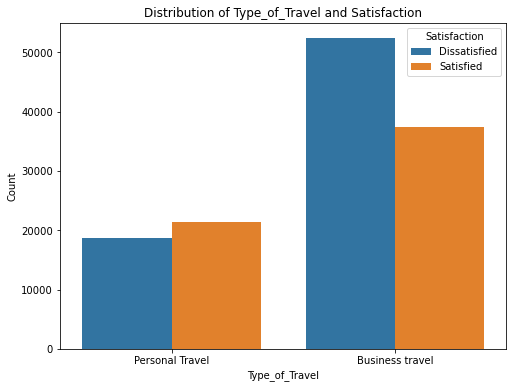

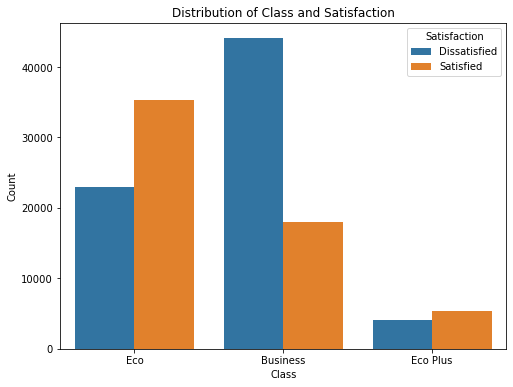

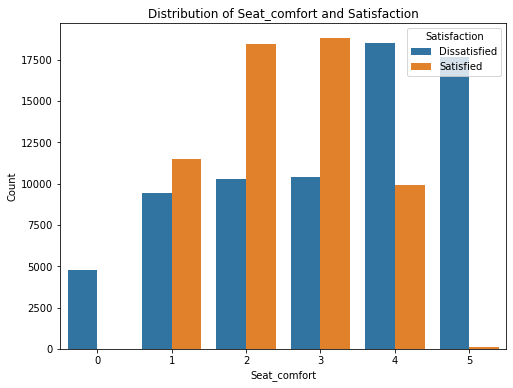

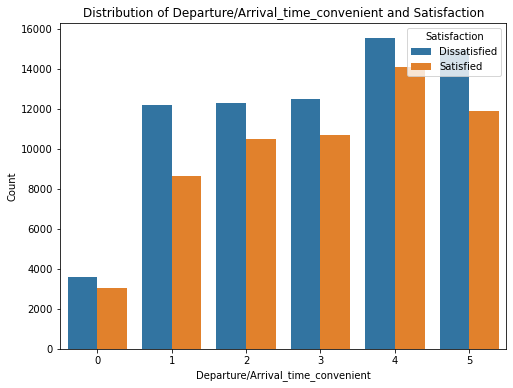

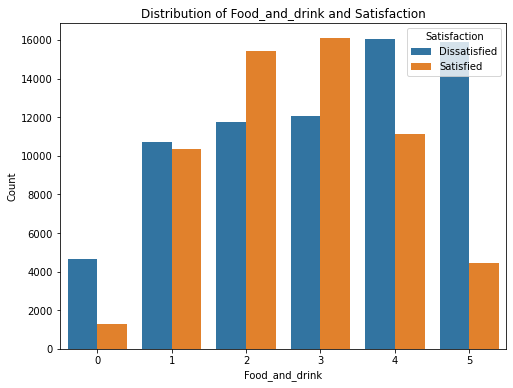

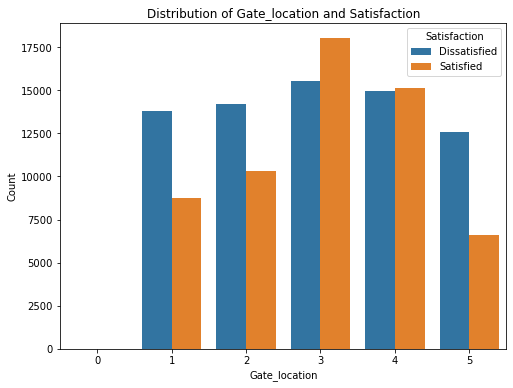

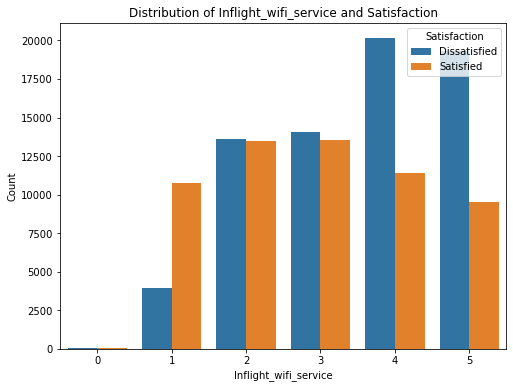

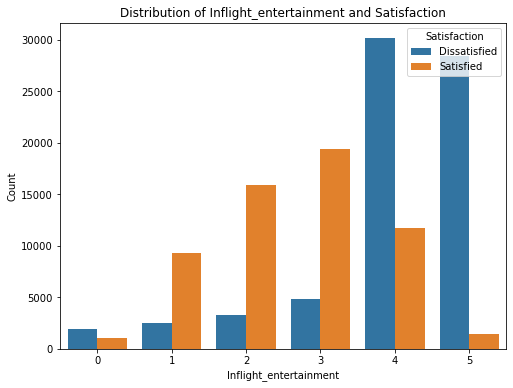

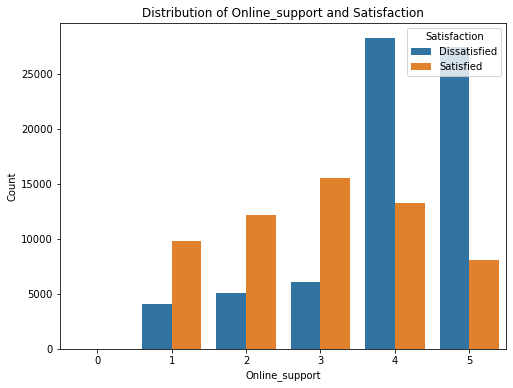

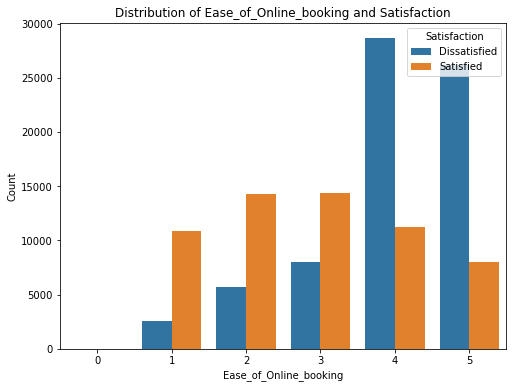

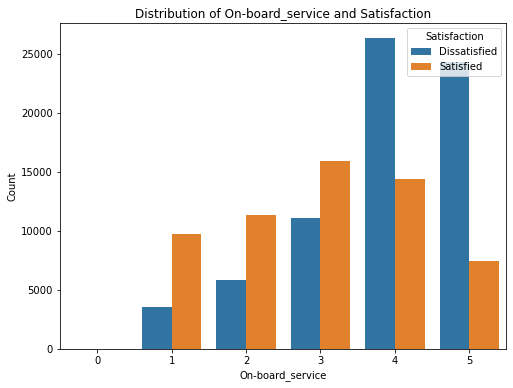

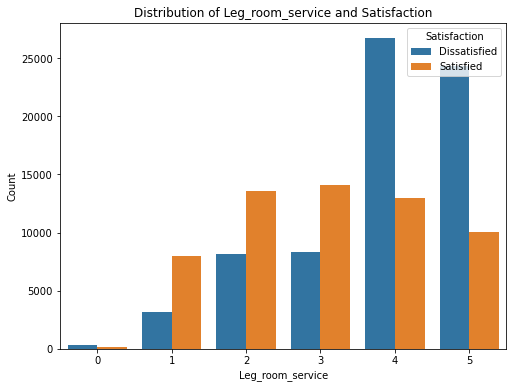

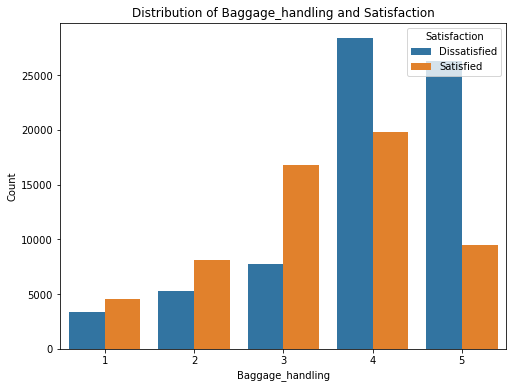

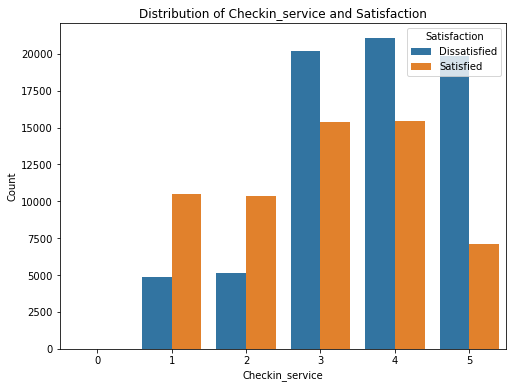

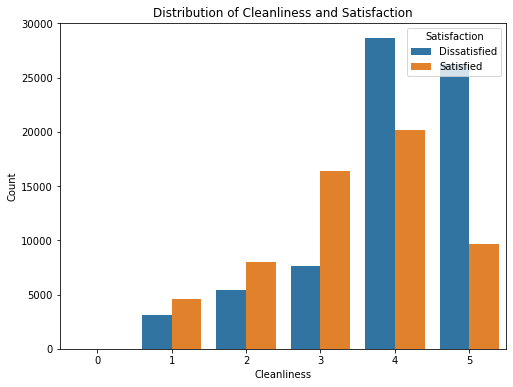

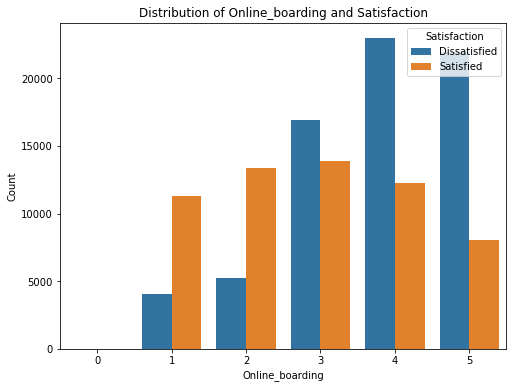

In [336]:
for column in categorical_features_1:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=airline, x=column, hue='satisfaction')
    plt.title(f'Distribution of {column} and Satisfaction')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(title='Satisfaction', loc='upper right', labels=['Dissatisfied', 'Satisfied'])
    plt.show()

In [215]:
airline[['Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes','Flight_Distance']].corr()

,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,Flight_Distance
Departure_Delay_in_Minutes,1.000000,0.965291,0.112555
Arrival_Delay_in_Minutes,0.965291,1.000000,0.110103
Flight_Distance,0.112555,0.110103,1.000000


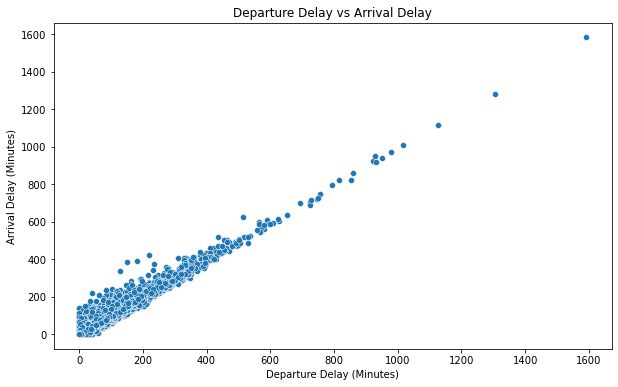

In [307]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=airline, x='Departure_Delay_in_Minutes', y='Arrival_Delay_in_Minutes')
plt.title('Departure Delay vs Arrival Delay')
plt.xlabel('Departure Delay (Minutes)')
plt.ylabel('Arrival Delay (Minutes)')
plt.show()


#### strong relationship between delay of departure and arrival

We can take one and drop the other as there is a very strong relationship between the two columns so might as well only take one. But lets populate and see how this is going to effect the overall acurraccy.

#### Filling null values in arrival delay using predictive model

In [338]:
X = airline.dropna()['Departure_Delay_in_Minutes'].values.reshape(-1, 1)
y = airline.dropna()['Arrival_Delay_in_Minutes'].values

In [339]:
regression_model = LinearRegression()
regression_model.fit(X, y)

LinearRegression()

In [340]:
missing_indices = airline[airline['Arrival_Delay_in_Minutes'].isnull()].index
missing_departure_delays = airline.loc[missing_indices, 'Departure_Delay_in_Minutes'].values.reshape(-1, 1)
predicted_arrival_delays = regression_model.predict(missing_departure_delays)

In [341]:
airline.loc[missing_indices, 'Arrival_Delay_in_Minutes'] = predicted_arrival_delays

In [342]:
airline.loc[missing_indices, 'Arrival_Delay_in_Minutes'] 

145       20.334447
246        0.757464
710       24.249843
736        0.757464
818        0.757464
            ...    
127739    69.276903
128131     0.757464
128710    98.642376
129774     0.757464
129873     7.609408
Name: Arrival_Delay_in_Minutes, Length: 393, dtype: float64

In [343]:
airline['Arrival_Delay_in_Minutes'].isna().sum()

0

#### Encoding and feature engineering

In [344]:
airline['Customer_Type'] = airline['Customer_Type'].map({'Loyal Customer': 0, 'disloyal Customer': 1})

In [345]:
airline['satisfaction'] = airline['satisfaction'].map({'dissatisfied': 0, 'satisfied': 1})

In [346]:
airline['Gender'] = airline['Gender'].map({'Male': 1, 'Female': 2})

In [347]:
airline['Type_of_Travel'] = airline['Type_of_Travel'].map({'Personal Travel': 1, 'Business travel': 2})

In [348]:
airline['Class'] = airline['Class'].map({'Eco': 1, 'Business': 2 , 'Eco Plus':3})

direct label incoding can be used instead

In [349]:
airline['Class'].unique()

array([1, 2, 3], dtype=int64)

In [350]:
rating_features = ['Inflight_wifi_service', 'Departure/Arrival_time_convenient',
    'Ease_of_Online_booking', 'Gate_location', 'Food_and_drink',
    'Online_boarding', 'Seat_comfort', 'Inflight_entertainment',
    'On-board_service', 'Leg_room_service', 'Baggage_handling',
    'Checkin_service', 'Cleanliness'
]

airline['rating_features'] = airline[rating_features].mean(axis=1)

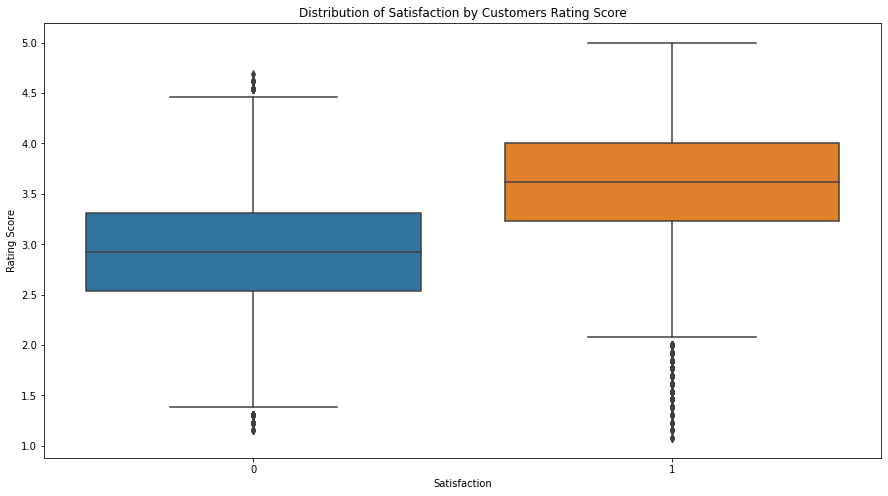

In [351]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='satisfaction', y='rating_features', data=airline)
plt.title('Distribution of Satisfaction by Customers Rating Score')
plt.xlabel('Satisfaction')
plt.ylabel('Rating Score')
plt.show()

In [352]:
airline.dtypes

satisfaction                           int64
Gender                                 int64
Customer_Type                          int64
Age                                    int64
Type_of_Travel                         int64
Class                                  int64
Flight_Distance                        int64
Seat_comfort                           int64
Departure/Arrival_time_convenient      int64
Food_and_drink                         int64
Gate_location                          int64
Inflight_wifi_service                  int64
Inflight_entertainment                 int64
Online_support                         int64
Ease_of_Online_booking                 int64
On-board_service                       int64
Leg_room_service                       int64
Baggage_handling                       int64
Checkin_service                        int64
Cleanliness                            int64
Online_boarding                        int64
Departure_Delay_in_Minutes             int64
Arrival_De

#### Building Models

In [353]:
airline.describe()

,satisfaction,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Seat_comfort,Departure/Arrival_time_convenient,Food_and_drink,Gate_location,Inflight_wifi_service,Inflight_entertainment,Online_support,Ease_of_Online_booking,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,rating_features
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,0.547328,1.507384,0.183092,39.427957,1.690584,1.623514,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.159969,3.294013
std,0.497757,0.499947,0.386743,15.119360,0.462255,0.616170,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.592348,0.671976
min,0.000000,1.000000,0.000000,7.000000,1.000000,1.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.076923
25%,0.000000,1.000000,0.000000,27.000000,1.000000,1.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,2.846154
50%,1.000000,2.000000,0.000000,40.000000,2.000000,2.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000,3.307692
75%,1.000000,2.000000,0.000000,51.000000,2.000000,2.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,3.769231
max,1.000000,2.000000,1.000000,85.000000,2.000000,3.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000,5.000000


In [354]:
y = airline["satisfaction"]

In [355]:
y

0         1
1         1
2         1
3         1
4         1
         ..
129875    1
129876    0
129877    0
129878    0
129879    0
Name: satisfaction, Length: 129880, dtype: int64

In [356]:
x = airline.drop('satisfaction', axis=1)

In [357]:
x.shape

(129880, 23)

In [358]:
y.shape

(129880,)

##### First Approach

In [359]:
x_1 = x.copy()

In [360]:
x_1

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Seat_comfort,Departure/Arrival_time_convenient,Food_and_drink,Gate_location,Inflight_wifi_service,Inflight_entertainment,Online_support,Ease_of_Online_booking,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,rating_features
0,2,0,65,1,1,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0,2.076923
1,1,0,47,1,2,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0,2.076923
2,2,0,15,1,1,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0,2.076923
3,2,0,60,1,1,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0,1.615385
4,2,0,70,1,1,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0,2.076923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,2,1,29,1,1,1731,5,5,5,3,2,5,2,2,3,3,4,4,4,2,0,0.0,3.615385
129876,1,1,63,1,2,2087,2,3,2,4,2,1,1,3,2,3,3,1,2,1,174,172.0,2.230769
129877,1,1,69,1,1,2320,3,0,3,3,3,2,2,4,4,3,4,2,3,2,155,163.0,2.769231
129878,1,1,66,1,1,2450,3,2,3,2,3,2,2,3,3,2,3,2,1,2,193,205.0,2.384615


In [361]:
x_1.columns

Index(['Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 'Class',
       'Flight_Distance', 'Seat_comfort', 'Departure/Arrival_time_convenient',
       'Food_and_drink', 'Gate_location', 'Inflight_wifi_service',
       'Inflight_entertainment', 'Online_support', 'Ease_of_Online_booking',
       'On-board_service', 'Leg_room_service', 'Baggage_handling',
       'Checkin_service', 'Cleanliness', 'Online_boarding',
       'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes',
       'rating_features'],
      dtype='object')

In [362]:
columns_to_normalize = ['Flight_Distance', 'Arrival_Delay_in_Minutes','Departure_Delay_in_Minutes']

In [363]:
scaler = MinMaxScaler()

In [364]:
x_1[columns_to_normalize] = scaler.fit_transform(x_1[columns_to_normalize])

In [365]:
X_train, X_test, y_train, y_test = train_test_split(x_1, y, test_size=0.2, random_state=42)

In [366]:
models = {}
models['Logistic Regression'] = LogisticRegression(max_iter=1000) 
models['Decision Trees'] = DecisionTreeClassifier()
models['Random Forest'] = RandomForestClassifier()
models['Naive Bayes'] = GaussianNB()
models['K-Nearest Neighbor'] = KNeighborsClassifier()

In [367]:
accuracy, precision, recall = {}, {}, {}

In [368]:
for key in models.keys():
    
    # Fit the classifier
    models[key].fit(X_train, y_train)
    
    # Make predictions
    predictions = models[key].predict(X_test)
    
    # Calculate metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)

In [369]:
df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model

,Accuracy,Precision,Recall
Logistic Regression,0.834694,0.847283,0.851690
Decision Trees,0.938058,0.944689,0.942909
Random Forest,0.958423,0.953430,0.970532
Naive Bayes,0.813713,0.831550,0.830331
K-Nearest Neighbor,0.904720,0.897560,0.927055


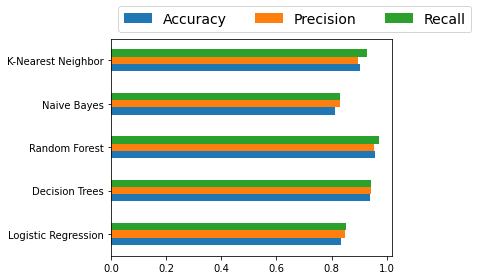

In [370]:
ax = df_model.plot.barh()
ax.legend(
    ncol=len(models.keys()), 
    bbox_to_anchor=(0, 1), 
    loc='lower left', 
    prop={'size': 14}
)
plt.tight_layout()

<Figure size 720x576 with 0 Axes>

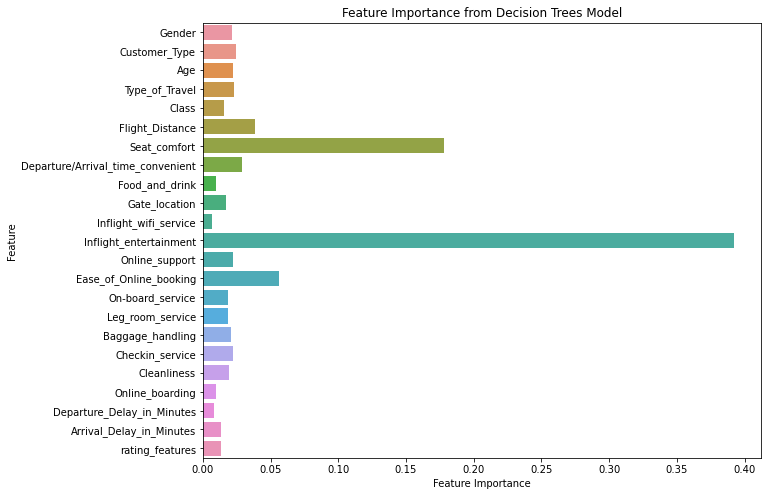

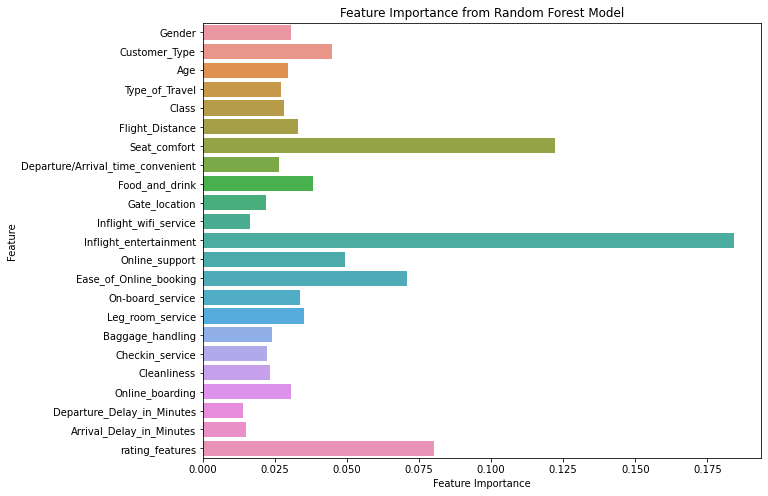

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

In [371]:
models_except_dl = {key: value for key, value in models.items()}

for key, model in models_except_dl.items():
    plt.figure(figsize=(10, 8))
    if key == 'Random Forest':
        feature_importance = model.feature_importances_
        sns.barplot(x=feature_importance, y=X_train.columns)
        plt.title(f'Feature Importance from {key} Model')
        plt.xlabel('Feature Importance')
        plt.ylabel('Feature')
        plt.show()
    elif key == 'Decision Trees':
        feature_importance = model.feature_importances_
        sns.barplot(x=feature_importance, y=X_train.columns)
        plt.title(f'Feature Importance from {key} Model')
        plt.xlabel('Feature Importance')
        plt.ylabel('Feature')
        plt.show()

##### Second Approach

In [372]:
x_2 = x_1.copy

In [373]:
x_2 = pd.DataFrame(x_1).copy()

In [374]:
x_2.columns

Index(['Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 'Class',
       'Flight_Distance', 'Seat_comfort', 'Departure/Arrival_time_convenient',
       'Food_and_drink', 'Gate_location', 'Inflight_wifi_service',
       'Inflight_entertainment', 'Online_support', 'Ease_of_Online_booking',
       'On-board_service', 'Leg_room_service', 'Baggage_handling',
       'Checkin_service', 'Cleanliness', 'Online_boarding',
       'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes',
       'rating_features'],
      dtype='object')

In [378]:
columns_to_keep=['Gender','Customer_Type','Age','Type_of_Travel','Class','Flight_Distance','Departure_Delay_in_Minutes','rating_features']

In [379]:
x_2 = x_2.loc[:,columns_to_keep]

In [381]:
x_2

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Departure_Delay_in_Minutes,rating_features
0,2,0,65,1,1,0.031155,0.000000,2.076923
1,1,0,47,1,2,0.349804,0.194724,2.076923
2,2,0,15,1,1,0.302565,0.000000,2.076923
3,2,0,60,1,1,0.083031,0.000000,1.615385
4,2,0,70,1,1,0.044052,0.000000,2.076923
...,...,...,...,...,...,...,...,...
129875,2,1,29,1,1,0.243588,0.000000,3.615385
129876,1,1,63,1,2,0.295175,0.109296,2.230769
129877,1,1,69,1,1,0.328938,0.097362,2.769231
129878,1,1,66,1,1,0.347776,0.121231,2.384615


In [382]:
X_train_2, X_test_2, y_train, y_test = train_test_split(x_2, y, test_size=0.2, random_state=42)

In [383]:
for key in models.keys():
    
    # Fit the classifier
    models[key].fit(X_train_2, y_train)
    
    # Make predictions
    predictions = models[key].predict(X_test_2)
    
    # Calculate metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)

In [384]:
df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model

,Accuracy,Precision,Recall
Logistic Regression,0.784339,0.815887,0.797158
Decision Trees,0.774484,0.795399,0.795065
Random Forest,0.832461,0.850080,0.846293
Naive Bayes,0.752656,0.826516,0.749810
K-Nearest Neighbor,0.824954,0.845605,0.837930


In [ ]:
models_except_dl = {key: value for key, value in models.items()}

for key, model in models_except_dl.items():
    plt.figure(figsize=(10, 8))
    if key == 'Random Forest':
        feature_importance = model.feature_importances_
        sns.barplot(x=feature_importance, y=X_train.columns)
        plt.title(f'Feature Importance from {key} Model')
        plt.xlabel('Feature Importance')
        plt.ylabel('Feature')
        plt.show()
    elif key == 'Decision Trees':
        feature_importance = model.feature_importances_
        sns.barplot(x=feature_importance, y=X_train.columns)
        plt.title(f'Feature Importance from {key} Model')
        plt.xlabel('Feature Importance')
        plt.ylabel('Feature')
        plt.show()

##### Third Approach

In [385]:
x_3 = x_1.copy()

In [386]:
x_3

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Seat_comfort,Departure/Arrival_time_convenient,Food_and_drink,Gate_location,Inflight_wifi_service,Inflight_entertainment,Online_support,Ease_of_Online_booking,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,rating_features
0,2,0,65,1,1,0.031155,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0.000000,0.000000,2.076923
1,1,0,47,1,2,0.349804,0,0,0,3,0,2,2,3,4,4,4,2,3,2,0.194724,0.192551,2.076923
2,2,0,15,1,1,0.302565,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0.000000,0.000000,2.076923
3,2,0,60,1,1,0.083031,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0.000000,0.000000,1.615385
4,2,0,70,1,1,0.044052,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0.000000,0.000000,2.076923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,2,1,29,1,1,0.243588,5,5,5,3,2,5,2,2,3,3,4,4,4,2,0.000000,0.000000,3.615385
129876,1,1,63,1,2,0.295175,2,3,2,4,2,1,1,3,2,3,3,1,2,1,0.109296,0.108586,2.230769
129877,1,1,69,1,1,0.328938,3,0,3,3,3,2,2,4,4,3,4,2,3,2,0.097362,0.102904,2.769231
129878,1,1,66,1,1,0.347776,3,2,3,2,3,2,2,3,3,2,3,2,1,2,0.121231,0.129419,2.384615


In [387]:
x_3.columns

Index(['Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 'Class',
       'Flight_Distance', 'Seat_comfort', 'Departure/Arrival_time_convenient',
       'Food_and_drink', 'Gate_location', 'Inflight_wifi_service',
       'Inflight_entertainment', 'Online_support', 'Ease_of_Online_booking',
       'On-board_service', 'Leg_room_service', 'Baggage_handling',
       'Checkin_service', 'Cleanliness', 'Online_boarding',
       'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes',
       'rating_features'],
      dtype='object')

In [388]:
x_3.drop("Arrival_Delay_in_Minutes",axis=1)

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Seat_comfort,Departure/Arrival_time_convenient,Food_and_drink,Gate_location,Inflight_wifi_service,Inflight_entertainment,Online_support,Ease_of_Online_booking,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding,Departure_Delay_in_Minutes,rating_features
0,2,0,65,1,1,0.031155,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0.000000,2.076923
1,1,0,47,1,2,0.349804,0,0,0,3,0,2,2,3,4,4,4,2,3,2,0.194724,2.076923
2,2,0,15,1,1,0.302565,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0.000000,2.076923
3,2,0,60,1,1,0.083031,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0.000000,1.615385
4,2,0,70,1,1,0.044052,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0.000000,2.076923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,2,1,29,1,1,0.243588,5,5,5,3,2,5,2,2,3,3,4,4,4,2,0.000000,3.615385
129876,1,1,63,1,2,0.295175,2,3,2,4,2,1,1,3,2,3,3,1,2,1,0.109296,2.230769
129877,1,1,69,1,1,0.328938,3,0,3,3,3,2,2,4,4,3,4,2,3,2,0.097362,2.769231
129878,1,1,66,1,1,0.347776,3,2,3,2,3,2,2,3,3,2,3,2,1,2,0.121231,2.384615


In [389]:
X_train_3, X_test_3, y_train, y_test = train_test_split(x_3, y, test_size=0.2, random_state=42)

In [390]:
for key in models.keys():
    
    # Fit the classifier
    models[key].fit(X_train_3, y_train)
    
    # Make predictions
    predictions = models[key].predict(X_test_3)
    
    # Calculate metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)

In [391]:
df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model

,Accuracy,Precision,Recall
Logistic Regression,0.834694,0.847283,0.851690
Decision Trees,0.937981,0.945528,0.942037
Random Forest,0.957769,0.953290,0.969492
Naive Bayes,0.813713,0.831550,0.830331
K-Nearest Neighbor,0.904720,0.897560,0.927055


<Figure size 720x576 with 0 Axes>

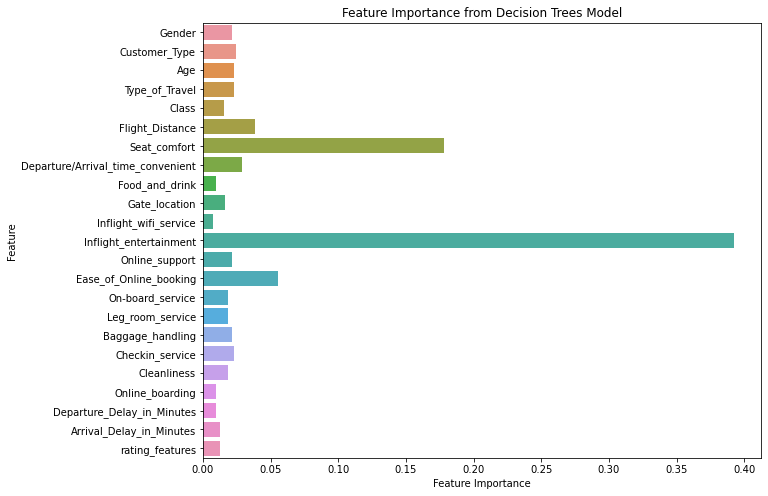

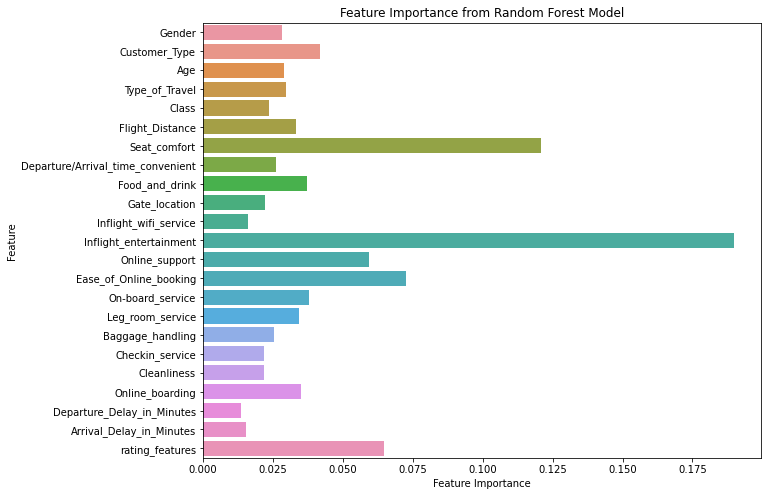

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

In [392]:
models_except_dl = {key: value for key, value in models.items()}

for key, model in models_except_dl.items():
    plt.figure(figsize=(10, 8))
    if key == 'Random Forest':
        feature_importance = model.feature_importances_
        sns.barplot(x=feature_importance, y=X_train.columns)
        plt.title(f'Feature Importance from {key} Model')
        plt.xlabel('Feature Importance')
        plt.ylabel('Feature')
        plt.show()
    elif key == 'Decision Trees':
        feature_importance = model.feature_importances_
        sns.barplot(x=feature_importance, y=X_train.columns)
        plt.title(f'Feature Importance from {key} Model')
        plt.xlabel('Feature Importance')
        plt.ylabel('Feature')
        plt.show()

In [394]:
x_3.columns

Index(['Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 'Class',
       'Flight_Distance', 'Seat_comfort', 'Departure/Arrival_time_convenient',
       'Food_and_drink', 'Gate_location', 'Inflight_wifi_service',
       'Inflight_entertainment', 'Online_support', 'Ease_of_Online_booking',
       'On-board_service', 'Leg_room_service', 'Baggage_handling',
       'Checkin_service', 'Cleanliness', 'Online_boarding',
       'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes',
       'rating_features'],
      dtype='object')

###### "In First and third approaches, the Decision Tree classifier identifies 'Inflight_entertainment' and 'Seat_comfort' as the top two columns contributing to the prediction of customer satisfaction."

###### "However, the Random Forest classifier extends the 'Top Contributors' list from the Decision Tree classifier by including the 'rating_features' as an additional influential factor."

##### Deep Learning

In [395]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [396]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [397]:
model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.1)

Epoch 1/50
1462/1462 [==============================] - 10s 5ms/step - loss: 0.4352 - accuracy: 0.8017 - val_loss: 0.2964 - val_accuracy: 0.8764
Epoch 2/50
1462/1462 [==============================] - 7s 5ms/step - loss: 0.2726 - accuracy: 0.8858 - val_loss: 0.2561 - val_accuracy: 0.8986
Epoch 3/50
1462/1462 [==============================] - 7s 5ms/step - loss: 0.2312 - accuracy: 0.9029 - val_loss: 0.2027 - val_accuracy: 0.9147
Epoch 4/50
1462/1462 [==============================] - 7s 5ms/step - loss: 0.2105 - accuracy: 0.9100 - val_loss: 0.2332 - val_accuracy: 0.8991
Epoch 5/50
1462/1462 [==============================] - 7s 5ms/step - loss: 0.2005 - accuracy: 0.9141 - val_loss: 0.1802 - val_accuracy: 0.9220
Epoch 6/50
1462/1462 [==============================] - 7s 5ms/step - loss: 0.1946 - accuracy: 0.9167 - val_loss: 0.1899 - val_accuracy: 0.9131
Epoch 7/50
1462/1462 [==============================] - 7s 5ms/step - loss: 0.1876 - accuracy: 0.9187 - val_loss: 0.1853 - val_accuracy

In [398]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy:.4f}")

812/812 [==============================] - 3s 4ms/step - loss: 0.1329 - accuracy: 0.9468
Test accuracy: 0.9468


In [399]:
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

812/812 [==============================] - 3s 3ms/step


In [400]:
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

In [401]:
print(f"Test accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Test accuracy: 0.9468
Precision: 0.9794
Recall: 0.9229
F1-score: 0.9503
